## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [142]:
#Daven Prashar-Savoie
#Full time online
#Due Jan 19 2020
#Rafael Carassco 
#Blog post URL = 

# Loading Packages and Data into dictionaries

In [143]:
import os 
import numpy as np
import pandas as pd
from glob import glob 

In [144]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [145]:
os.listdir() #use the os function to see all the file names 

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.learn',
 'awesome.gif',
 'Budgets_Genres_MostProfitable.ipynb',
 'CONTRIBUTING.md',
 'LICENSE.md',
 'module1_project_rubric.pdf',
 'movies_db.sqlite',
 'README.md',
 'README.md.ipynb',
 'student.ipynb',
 'Studios_Reviews.ipynb',
 'zippedData']

In [146]:
#create a variable that lists all the files in the zipped file folder

zipped_data = os.listdir(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData")
print(zipped_data)

['bom.movie_gross.csv', 'imdb.name.basics.csv', 'rt.movie_info.tsv', 'rt.reviews.tsv', 'title.akas.csv', 'title.basics.csv', 'title.crew.csv', 'title.principals.csv', 'title.ratings.csv', 'tmdb.movies.csv', 'tn.movie_budgets.csv']


In [147]:
#Short form way of loading multiple files - DO THIS
#Problem is how do i assign these dictionaries to be workable lists like below?

csv_files = glob(r"zippedData\*.csv")
csv_files 

['zippedData\\bom.movie_gross.csv',
 'zippedData\\imdb.name.basics.csv',
 'zippedData\\title.akas.csv',
 'zippedData\\title.basics.csv',
 'zippedData\\title.crew.csv',
 'zippedData\\title.principals.csv',
 'zippedData\\title.ratings.csv',
 'zippedData\\tmdb.movies.csv',
 'zippedData\\tn.movie_budgets.csv']

In [148]:
#Create a dictionary, populate with cleaned filenames 
#Change . to _
#
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

In [149]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'title_akas', 'title_basics', 'title_crew', 'title_principals', 'title_ratings', 'tmdb_movies', 'tn_movie_budgets'])

In [150]:
#REALLY IMPORTANT QUESTION - 
#can i change the keY: value pairs in the csv files dictionary to a df so i can use pandas with each of the csv's individually!
#like i did below

list(csv_files_dict.values())

[                                                 studio  domestic_gross  \
 title                                                                     
 Toy Story 3                                          BV     415000000.0   
 Alice in Wonderland (2010)                           BV     334200000.0   
 Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
 Inception                                            WB     292600000.0   
 Shrek Forever After                                P/DW     238700000.0   
 ...                                                 ...             ...   
 The Quake                                         Magn.          6200.0   
 Edward II (2018 re-release)                          FM          4800.0   
 El Pacto                                           Sony          2500.0   
 The Swan                                     Synergetic          2400.0   
 An Actor Prepares                                 Grav.          1700.0   
 
          

# Loading Files & Cleaning bom_movie_gross

In [151]:
#long form way of loading multiple files - DONT DO THIS
#Question: can i load these with a function?
#can i clean the titles, with a function? 

bom_movie_gross = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\bom.movie_gross.csv")
imdb_name_basics = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\imdb.name.basics.csv")  
titles_akas = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.akas.csv")
titles_basics = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.basics.csv")
title_crew = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.crew.csv")
title_principals = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.principals.csv")
title_ratings = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\title.ratings.csv")
tmdb_movies = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\tmdb.movies.csv")
tn_movies_budgets = pd.read_csv(r"C:\Users\User\flatiron\finalproject\dsc-mod-1-project-v2-1-online-ds-ft-120919\zippedData\tn.movie_budgets.csv")

In [152]:
#we need to convert the foreign_gross to float64, maybe we need to change title and studio to string as well
bom_movie_gross.dtypes 

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [153]:
#Code that converts comma to empty space 

bom_movie_gross['foreign_gross'] = bom_movie_gross.foreign_gross.str.replace(',', '').astype(float)

In [154]:
#original conversion failed due to a comma in one of the values, removed comma as shown above 
bom_movie_gross['foreign_gross'] = bom_movie_gross.foreign_gross.astype(float)

In [155]:
#You can see the dtypes have changed 
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

# EDA and Creating New Columns for bom_movie_gross

In [156]:
highest_dom_gross = bom_movie_gross['domestic_gross'].max()
print(highest_dom_gross)

936700000.0


In [157]:
bom_movie_gross['domestic_gross'].min()

100.0

bom_movie_gross['domestic_gross'].mean()

In [158]:
import seaborn as sns 

Text(0.5, 1.0, 'Boxplot of Domestic Gross')

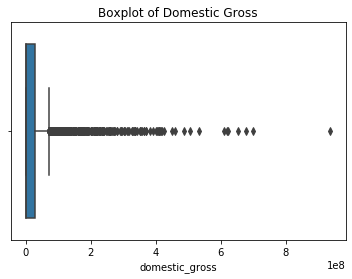

In [159]:
sns.boxplot(bom_movie_gross['domestic_gross']) #read into boxplot 
plt.title('Boxplot of Domestic Gross')

In [160]:
bom_movie_gross['domestic_gross'].dtype

dtype('float64')

In [161]:
bom_movie_gross.groupby(['domestic_gross']).max()

,title,studio,foreign_gross,year
domestic_gross,,,,
100.0,Storage 24,Magn.,NaN,2013
300.0,The Chambermaid,Magn.,NaN,2016
400.0,Apartment 143,Magn.,426000.0,2017
500.0,Max & Leon,Distrib.,NaN,2017
600.0,Death of a Superhero,Trib.,NaN,2012
...,...,...,...,...
623400000.0,Marvel's The Avengers,BV,895500000.0,2012
652300000.0,Jurassic World,Uni.,1019.4,2015
678800000.0,Avengers: Infinity War,BV,1369.5,2018


In [162]:
bom_movie_gross.min()

title              '71
domestic_gross     100
foreign_gross      600
year              2010
dtype: object

In [163]:
#create new column for total gross 

bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [164]:
#Investigatiing columns for all existing files 
os.listdir('zippedData')

['bom.movie_gross.csv',
 'imdb.name.basics.csv',
 'rt.movie_info.tsv',
 'rt.reviews.tsv',
 'title.akas.csv',
 'title.basics.csv',
 'title.crew.csv',
 'title.principals.csv',
 'title.ratings.csv',
 'tmdb.movies.csv',
 'tn.movie_budgets.csv']

In [165]:
#Printed all the tables and headers of csv's 
#Objective is to create an sqlite3 db 
#Clear shows variables tconst, nconst
print("bom Movie gross")
bom_movie_gross.head()
print("IMBD Name Basics") 
imdb_name_basics.head()
print('Title AKAS')
titles_akas.head()
print('Title Basics')
titles_basics.head()
print('Title Crew')
title_crew.head()
print('title principals')
title_principals.head()
print('title ratings')
title_ratings.head()
print('tmdb movies')
tmdb_movies.head()
print('tn movies budget')
tn_movies_budgets.head()

bom Movie gross


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


IMBD Name Basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


Title AKAS


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


Title Basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Title Crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


title principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


title ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


tmdb movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


tn movies budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Created sqlite database & Populated with Data

In [166]:
#Creating sqlite database 
import sqlite3

In [167]:
#Create an sqlite3 file in your directory with no files in it 
conn = sqlite3.connect("movies_db.sqlite")

In [168]:
#Function creates sql tables from df's using 
#try method -
#if it cant make the table, it will alert you 

def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"created table {name}")
        
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [169]:
for name, table in csv_files_dict.items():
    create_sql_table_from_df(table, name, conn)

could not make table bom_movie_gross
Table 'bom_movie_gross' already exists.
could not make table imdb_name_basics
Table 'imdb_name_basics' already exists.
could not make table title_akas
Table 'title_akas' already exists.
could not make table title_basics
Table 'title_basics' already exists.
could not make table title_crew
Table 'title_crew' already exists.
could not make table title_principals
Table 'title_principals' already exists.
could not make table title_ratings
Table 'title_ratings' already exists.
could not make table tmdb_movies
Table 'tmdb_movies' already exists.
could not make table tn_movie_budgets
Table 'tn_movie_budgets' already exists.


In [170]:
# Can you explain why this is necessary? 

# Now create a .gitignore file that will ignore the files that you unzipped and the sqlite file
# look at mine for a reference
# you cannot push files bigger than 100 MB to github from your computer

# you can create your file here in jupyter and open it from jupyter

#what does the w+ do? 

with open("./.gitignore", "w+") as f:
    f.write("*.sqlite") # put files you want to ignore here
    f.write("\n") # insert a new line after each file
    f.write("zippedData/")
    f.write("\n")
    f.write("zippedData/*.csv")
    f.write("\n")
    f.write("zippedData/*.gz")
 

8

1

11

1

16

1

15

In [171]:
#what types of joins could be useful for future processing? 
#Shared keys include - tconst(title constant), nconst 

# Questions: 

# What is the distribution of revenue across the film industry? 

# What titles and studios are earning the most?



--------------------------------------------------------------


# Continue EDA bom_movie_gross
Top grossing titles
First attempts at scatter plots 
First attempts at studio counts

In [172]:
import matplotlib.pyplot as plt

In [173]:
data = bom_movie_gross['total_gross']
data2 = bom_movie_gross['title']

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1556.,  219.,   94.,   46.,   39.,   23.,   14.,    9.,    7.,
           2.]),
 array([4.90000000e+03, 1.51894410e+08, 3.03783920e+08, 4.55673430e+08,
        6.07562940e+08, 7.59452450e+08, 9.11341960e+08, 1.06323147e+09,
        1.21512098e+09, 1.36701049e+09, 1.51890000e+09]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Histogram of Total Gross from BOM')

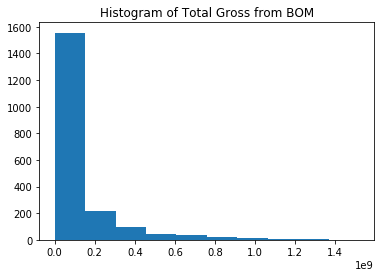

In [174]:
plt.hist(data, bins=10)
plt.title('Histogram of Total Gross from BOM')
plt.show()

In [175]:
prod_budget = tn_movies_budgets['production_budget']
prod_budget.head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

Text(0.5, 1.0, 'Scatter plot of domestic gross and foreign gross ')

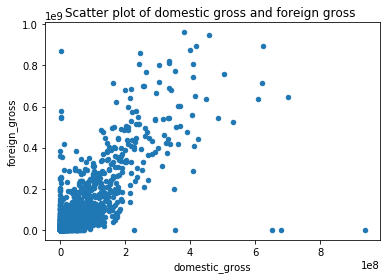

In [176]:
#Scatter plot of domestic gross and foreign gross 

bom_movie_gross.plot.scatter(x = 'domestic_gross', 
                            y = 'foreign_gross')

plt.title('Scatter plot of domestic gross and foreign gross ')

In [177]:
bom_movie_gross['title']

0                                       Toy Story 3
1                        Alice in Wonderland (2010)
2       Harry Potter and the Deathly Hallows Part 1
3                                         Inception
4                               Shrek Forever After
                           ...                     
3382                                      The Quake
3383                    Edward II (2018 re-release)
3384                                       El Pacto
3385                                       The Swan
3386                              An Actor Prepares
Name: title, Length: 3387, dtype: object

In [178]:
#Need to remove duplicate 
bom_movie_gross['title'].value_counts()

Bluebeard                         2
Jumanji: Welcome to the Jungle    1
Jackass Presents: Bad Grandpa     1
American Honey                    1
RoboCop (2014)                    1
                                 ..
Certain Women                     1
Mozart's Sister                   1
To Rome with Love                 1
The Autopsy of Jane Doe           1
7 Days in Entebbe                 1
Name: title, Length: 3386, dtype: int64

In [179]:
#Need to remove duplicate 
bom_movie_gross['title'].value_counts()

Bluebeard                         2
Jumanji: Welcome to the Jungle    1
Jackass Presents: Bad Grandpa     1
American Honey                    1
RoboCop (2014)                    1
                                 ..
Certain Women                     1
Mozart's Sister                   1
To Rome with Love                 1
The Autopsy of Jane Doe           1
7 Days in Entebbe                 1
Name: title, Length: 3386, dtype: int64

In [180]:
total_gross = bom_movie_gross.groupby(['total_gross'])

In [181]:
print('Unique Studio Count: ' + str(len(bom_movie_gross['studio'].unique())))

#Set index to studios
bom_movie_gross.set_index('studio')

Unique Studio Count: 258


,title,domestic_gross,foreign_gross,year,total_gross
studio,,,,,
BV,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
BV,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
WB,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
WB,Inception,292600000.0,535700000.0,2010,8.283000e+08
P/DW,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
Magn.,The Quake,6200.0,NaN,2018,NaN
FM,Edward II (2018 re-release),4800.0,NaN,2018,NaN
Sony,El Pacto,2500.0,NaN,2018,NaN


In [182]:
bom_movie_gross[['studio', 'total_gross', 'title']]

,studio,total_gross,title
0,BV,1.067000e+09,Toy Story 3
1,BV,1.025500e+09,Alice in Wonderland (2010)
2,WB,9.603000e+08,Harry Potter and the Deathly Hallows Part 1
3,WB,8.283000e+08,Inception
4,P/DW,7.526000e+08,Shrek Forever After
...,...,...,...
3382,Magn.,NaN,The Quake
3383,FM,NaN,Edward II (2018 re-release)
3384,Sony,NaN,El Pacto
3385,Synergetic,NaN,The Swan


In [183]:
#Create a list of all the unique studio names 
#Sum the total gross 
#Groupby of studio by total gross 
df1 = bom_movie_gross[['studio', 'total_gross']]

bom_movie_gross.groupby(['studio', 'total_gross']).sum()

domestic_gross  foreign_gross  year
studio total_gross                                     
3D     16000000.0        6100000.0      9900000.0  2010
A24    74700.0             12500.0        62200.0  2016
       1863000.0          663000.0      1200000.0  2016
       2133300.0           33300.0      2100000.0  2016
       3200000.0         1100000.0      2100000.0  2014
...                            ...            ...   ...
Zeit.  1517000.0          317000.0      1200000.0  2012
       2171200.0           71200.0      2100000.0  2011
       3931000.0          231000.0      3700000.0  2014
       5035000.0          435000.0      4600000.0  2010
       9375000.0          675000.0      8700000.0  2010

[1993 rows x 3 columns]

In [184]:
#WOHOO created a table with the sum of total gross by studio
studio_gross = bom_movie_gross.groupby('studio')['total_gross'].sum().reset_index(name='sum')
studio_gross.head()

,studio,sum
0,3D,16000000.0
1,A23,0.0
2,A24,498919000.0
3,ADC,0.0
4,AF,4655000.0


In [185]:
print('highest amount earned by any studio')
studio_gross['sum'].max()

#creating a range by unique studios
y_pos =  np.arange(len(studio_gross['studio']))
x = studio_gross['sum']

highest amount earned by any studio


44190383899.1

<BarContainer object of 257 artists>

Text(0, 0.5, 'Total Gross')

Text(0.5, 0, 'Studios')

Text(0.5, 1.0, 'Studio Total Gross Distribution')

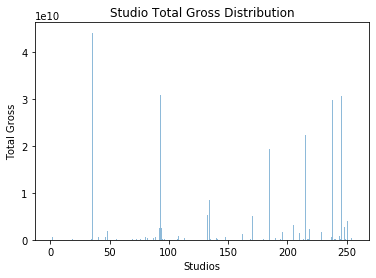

In [186]:
plt.bar(y_pos, x, align = 'center', alpha=0.5)
plt.ylabel('Total Gross')
plt.xlabel('Studios')
plt.title('Studio Total Gross Distribution')

#histogram 

In [187]:
bom_movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09


In [188]:
#bom_movie_gross.query("count(@studio) > 50")

In [189]:
studio_total_gross = bom_movie_gross.groupby('studio')['total_gross'].sum().sort_values(ascending=False)
studio_total_gross

studio
BV           4.419038e+10
Fox          3.098037e+10
WB           3.079150e+10
Uni.         2.974681e+10
Sony         2.240472e+10
                 ...     
Grav.        0.000000e+00
RLJ          0.000000e+00
TA           0.000000e+00
Dreamwest    0.000000e+00
Saban        0.000000e+00
Name: total_gross, Length: 257, dtype: float64

In [190]:
studio_total_gross.index[:5], studio_total_gross.values[:5]

(Index(['BV', 'Fox', 'WB', 'Uni.', 'Sony'], dtype='object', name='studio'),
 array([4.41903839e+10, 3.09803666e+10, 3.07915030e+10, 2.97468092e+10,
        2.24047151e+10]))

In [191]:
#Create top 5 and Bottom 5 Tables 

top_5 = studio_total_gross.index[:5].tolist()

bottom_5 = studio_total_gross.index[-5:].tolist()
print(top_5)
bom_movie_gross.query(f'studio in {top_5}')

['BV', 'Fox', 'WB', 'Uni.', 'Sony']


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
...,...,...,...,...,...,...
3263,The Front Runner,Sony,2000000.0,1200000.0,2018,3.200000e+06
3264,2001: A Space Odyssey (2018 re-release),WB,3200000.0,NaN,2018,NaN
3289,Schindler's List (2018 re-release),Uni.,833000.0,NaN,2018,NaN
3369,Loving Pablo,Uni.,22000.0,NaN,2018,NaN


<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Violin Plot of Bottom 5 Studios ')

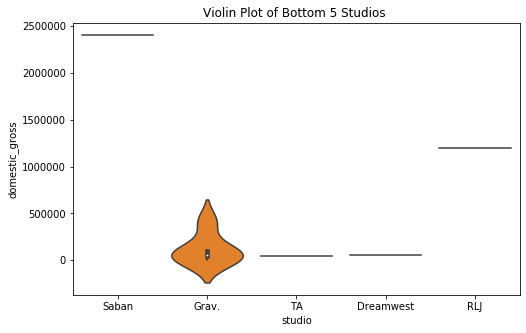

In [192]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='studio', y='domestic_gross', data=bom_movie_gross.query(f'studio in {bottom_5}'))
plt.title('Violin Plot of Bottom 5 Studios ')
plt.show()

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Violin Plot of Top 5 Studios')

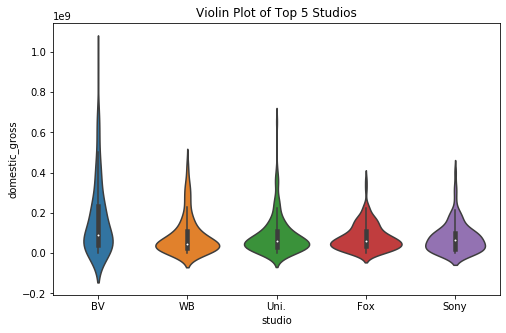

In [193]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='studio', y='domestic_gross', data=bom_movie_gross.query(f'studio in {top_5}'))
plt.title('Violin Plot of Top 5 Studios')
plt.show()

Text(0.5, 1.0, 'Distribution of Sum of Earnings of Studios')

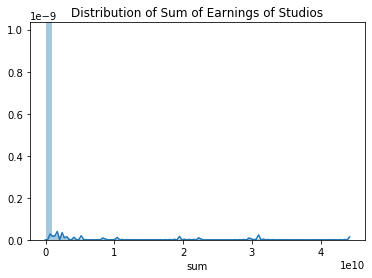

In [194]:
#Obvious need to drop outliers 
from scipy.stats import norm

sns.distplot(studio_gross['sum'])

plt.title('Distribution of Sum of Earnings of Studios')

# Top performing studios
# Could create a function that 

In [195]:
#Top studios 
studio_gross.sort_values(by = ['sum'], ascending = False)

,studio,sum
36,BV,4.419038e+10
93,Fox,3.098037e+10
246,WB,3.079150e+10
238,Uni.,2.974681e+10
215,Sony,2.240472e+10
...,...,...
165,Orion,0.000000e+00
53,Cdgm.,0.000000e+00
54,CineGalaxy,0.000000e+00
55,Cleopatra,0.000000e+00


# Data Cleaning tn_movies_budgets

Changed data types

In [196]:
prod_budget = tn_movies_budgets['production_budget']
prod_budget.head()

0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object

In [197]:
#Tried to plot prod budget vs total_gross but x and y need to be the same size

#Have the relevant data in tn_movies_budget, plotting those 

In [198]:
#This dataset is bigger
#Need to check for dupes
bom_movie_gross.shape
tn_movies_budgets.shape

(3387, 6)

(5782, 6)

In [199]:
#FAIL CODE 

tn_movies_budgets['total_gross'] = tn_movies_budgets['domestic_gross'] + tn_movies_budgets['worldwide_gross']
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","$760,507,625$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","$241,063,875$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","$42,762,350$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","$459,005,868$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","$620,181,382$1,316,721,747"


In [200]:
#the column created above did not wory due to dtypes
#Should i convert to string or int? how will commas impact it?

tn_movies_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
total_gross          object
dtype: object

In [201]:
#Replaced commas. now onto dollar signs. This is repetitive and i wanted \
#to find a faster way 
tn_movies_budgets['domestic_gross'].str.replace(',', '')

0       $760507625
1       $241063875
2        $42762350
3       $459005868
4       $620181382
           ...    
5777            $0
5778        $48482
5779         $1338
5780            $0
5781       $181041
Name: domestic_gross, Length: 5782, dtype: object


Created a function that removes $ sign and comma to save time 
DO NOT FORGET TO REASSIGN VARIABLES 
Biggest question here is repetition 
Help explaining how it works:

filter(function, iterable) does the following procedure:

Go through the elements in iterable (i.e. the second parameter) one at a time.
For each one of those elements, call function (i.e. the second parameter) on that element and see whether it returns true.
Collect together only those elements where the function returned true, and return a new list of those.

"".join(list) joins all items given they satisfy the filter function

In [202]:
valid = '1234567890.'
def clean(data):
    return int(''.join(filter(lambda char: char in valid, data)))

In [203]:
tn_movies_budgets['domestic_gross'] = tn_movies_budgets['domestic_gross'].apply(clean)

In [204]:
tn_movies_budgets['worldwide_gross'] =  tn_movies_budgets['worldwide_gross'].apply(clean)

In [205]:
tn_movies_budgets['production_budget'] = tn_movies_budgets['production_budget'].apply(clean)

In [206]:
tn_movies_budgets.drop(columns = ['total_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


Create new column - worldwide_gross

In [207]:
tn_movies_budgets['total_gross'] = tn_movies_budgets['domestic_gross'] + tn_movies_budgets['worldwide_gross']

# Questions:
# Do the distributions line up to bom dataset?
#

# EDA for tn_movies_budgets

In [208]:
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


Text(0.5, 1.0, 'Scatter Plot of Total Gross and Production Budget')

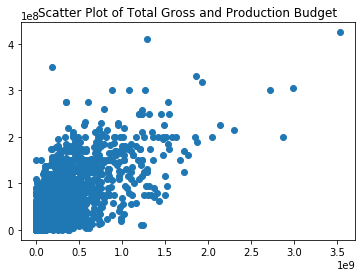

In [209]:
plt.scatter(x = tn_movies_budgets['total_gross'],
           y  = tn_movies_budgets['production_budget'])

plt.title('Scatter Plot of Total Gross and Production Budget')

Text(0.5, 1.0, 'Regression Plot of Total Gross and Production Budget')

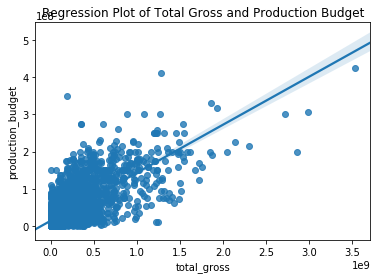

In [210]:
sns.regplot(x = tn_movies_budgets['total_gross'],
           y  = tn_movies_budgets['production_budget'])

plt.title('Regression Plot of Total Gross and Production Budget')

In [211]:
np.var(tn_movies_budgets['total_gross'])

5.756177449200343e+16

In [212]:
#binwidth = int(tn_movies_budgets['total_gross'].max()/10000000)

In [213]:
#Need to create a histogram to see distribution, establishing bin size


In [214]:
#this code managed to freeze my notebook !

#plt.hist(tn_movies_budgets['total_gross'], color = 'blue', edgecolor='black',
#        bins = range(min(tn_movies_budgets['total_gross']), max(tn_movies_budgets['total_gross']) + binwidth, binwidth))

In [215]:
#playing with variables to create useful graphs 
import seaborn as sns
y = np.random.normal(0, 1, size=30)
x = tn_movies_budgets['total_gross']
z = tn_movies_budgets['production_budget']

Text(0.5, 1.0, 'Distribution Plot of Total Gross')

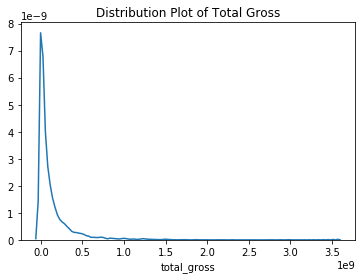

In [216]:
#Total gross
sns.distplot(x, hist=False);
plt.title('Distribution Plot of Total Gross')

Text(0.5, 1.0, 'Distribution of Production Budget')

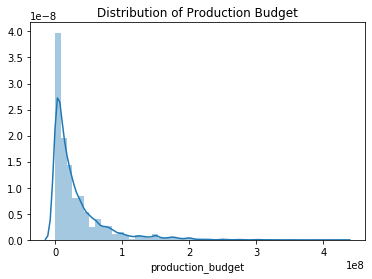

In [217]:
#Distribution plot of total budget
sns.distplot(z, hist=True);
plt.title('Distribution of Production Budget')

(array([1.225e+03, 2.550e+02, 2.000e+02, 1.620e+02, 1.440e+02, 1.570e+02,
        1.270e+02, 1.220e+02, 1.200e+02, 1.050e+02, 9.200e+01, 9.800e+01,
        8.300e+01, 6.900e+01, 8.200e+01, 7.700e+01, 6.200e+01, 6.400e+01,
        6.600e+01, 5.200e+01, 5.600e+01, 6.500e+01, 5.600e+01, 6.800e+01,
        5.300e+01, 5.800e+01, 3.900e+01, 4.600e+01, 5.500e+01, 4.000e+01,
        3.800e+01, 3.100e+01, 4.000e+01, 4.300e+01, 3.700e+01, 3.700e+01,
        3.800e+01, 4.100e+01, 3.100e+01, 2.700e+01, 3.200e+01, 2.800e+01,
        2.200e+01, 2.800e+01, 3.000e+01, 3.900e+01, 2.100e+01, 2.000e+01,
        2.100e+01, 3.000e+01, 2.100e+01, 2.200e+01, 1.900e+01, 1.900e+01,
        1.500e+01, 2.500e+01, 2.500e+01, 2.100e+01, 1.500e+01, 9.000e+00,
        1.500e+01, 1.800e+01, 1.700e+01, 1.100e+01, 1.400e+01, 1.200e+01,
        1.700e+01, 2.100e+01, 1.400e+01, 1.100e+01, 1.600e+01, 1.500e+01,
        1.600e+01, 1.300e+01, 1.100e+01, 1.400e+01, 1.000e+01, 1.100e+01,
        1.200e+01, 1.100e+01, 1.100e+0

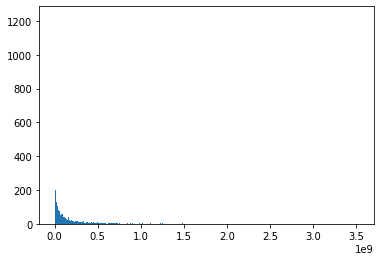

In [218]:
#Histogram of total_gross 

plt.hist(x, bins=1000)

In [219]:
#There is clearly a need to normalize values 
mu = tn_movies_budgets['total_gross'].mean()
sigma = tn_movies_budgets['total_gross'].std()

In [220]:

import seaborn as sns
from scipy.stats import uniform


In [221]:
#generate random numbers for uniform distribution
#https://www.datacamp.com/community/tutorials/probability-distributions-python
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution')]

Text(0.5, 1.0, 'Distribution of Total Gross')

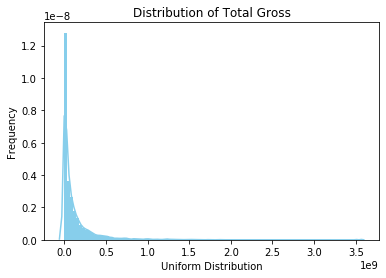

In [222]:
#Created uniform distribution lpot 
ax = sns.distplot(tn_movies_budgets['total_gross'],
                 bins = 100,
                 kde=True,
                 color='skyblue',
                 hist_kws = {"linewidth": 15, 'alpha': 1})
ax.set(xlabel='Uniform Distribution', ylabel = 'Frequency')
plt.title('Distribution of Total Gross')

In [223]:
#attempted to create a graph of a regular distirbution for comparision
from scipy.stats import norm

total_gross_norm = norm.rvs(size=1000, loc=0, scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

Text(0.5, 1.0, 'Normal Distribution for Reference')

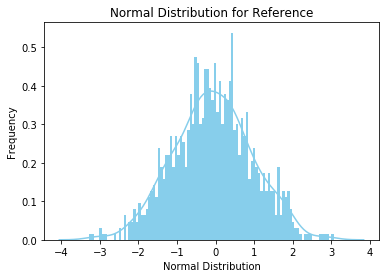

In [224]:
ax = sns.distplot(total_gross_norm,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.title('Normal Distribution for Reference')

In [225]:
bin_size = int(tn_movies_budgets['total_gross'].max())
bin_size

3536852904

Text(0.5, 1.0, 'Distribution of Total Gross of Movies')

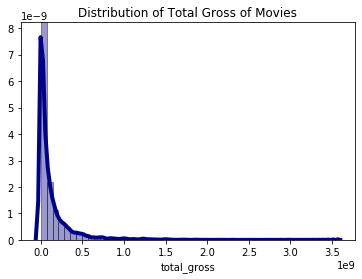

In [226]:
#clear issue with a top % of outliers
sns.distplot(tn_movies_budgets['total_gross'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Distribution of Total Gross of Movies')

In [227]:
tn_movies_budgets.loc[tn_movies_budgets['total_gross'] == tn_movies_budgets['total_gross'].max()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904


In [228]:
tn_movies_budgets['total_gross'].mean()

133360787.7734348

In [229]:
diff_between_max_mean= tn_movies_budgets['total_gross'].max() - tn_movies_budgets['total_gross'].mean()

Text(0.5, 1.0, 'boxplot of total_gross')

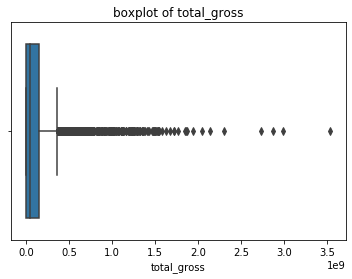

In [230]:
#boxplot of total_gross
sns.boxplot(tn_movies_budgets['total_gross'])
plt.title('boxplot of total_gross')

Text(0.5, 1.0, 'boxplot of production budget ')

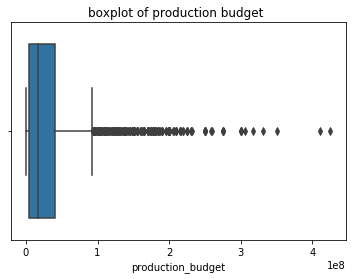

In [231]:
#boxplot of production budget 
sns.boxplot(tn_movies_budgets['production_budget'])
plt.title('boxplot of production budget ')

In [232]:
#Created two variables to work on 
x = tn_movies_budgets['production_budget']
y = tn_movies_budgets['total_gross']

Text(0.5, 1, 'Scatter plot of production budget vs total gross')

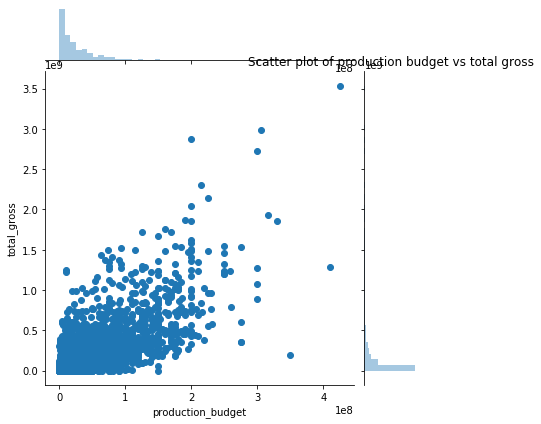

In [233]:
#Scatter plot of production budget vs total gross

sns.jointplot(x, y)
plt.title('Scatter plot of production budget vs total gross')

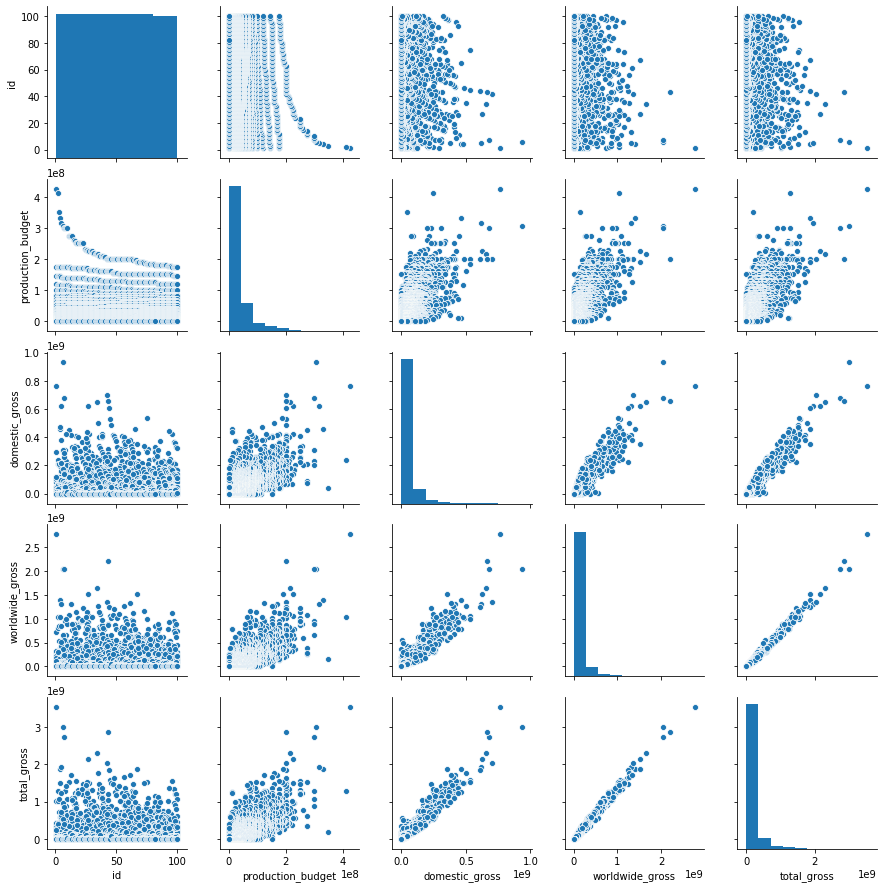

In [234]:
#some redundant graphs here but good to get a larger overview 
sns.pairplot(tn_movies_budgets)

# Outliers are a a big part of the top earners
# EDA into that subsection of the data 

# Highest Grossing
# Highest Production Budgets

In [235]:
# i want to take the top 25% total gross and plot it against production budget to see any outliers
tn_movies_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.333608e+08
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,2.399411e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,6.448924e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,4.605855e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.506937e+08
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09


# What are the highest grossing movies as a % of overall budget?

In [236]:
#contrbution of top100 films by total_gross

#Created two variables to work on in data cleaning above

x = tn_movies_budgets['production_budget']

y = tn_movies_budgets['total_gross']

#sum of largest 100
hundred_biggest_gross = sum(y.nlargest(n = 100))

print('Sum of Hundred Highest Grossing Movies')

hundred_biggest_gross

#sum of all movies
y_sum = sum(y)

print('Sum of All Movies')
y_sum

pct_of_gross_top100 = (hundred_biggest_gross/y_sum)*100

print('Percentage of Total Revenue Represented by the top 100 Movies')

pct_of_gross_top100

Sum of Hundred Highest Grossing Movies


138567941696

Sum of All Movies


771092074906

Percentage of Total Revenue Represented by the top 100 Movies


17.970349612644135

In [237]:
print('% Contribution of the top 100 Total Grossing Movies: ' + str((hundred_biggest_gross/y_sum)*100))

% Contribution of the top 100 Total Grossing Movies: 17.970349612644135


# What is the contribution of the highest production budgets ?

In [238]:
hundred_biggest_budget = sum(x.nlargest(n = 100))
hundred_biggest_budget

x_sum = sum(x)
x_sum

21814700000

182640411532

In [239]:
print('% Contribution of the top 100 Production budgets')
(hundred_biggest_budget/x_sum)*100

% Contribution of the top 100 Production budgets


11.944070765619085

# Is there a correlation between the top 100 grossing budgets and the top 100 budgets?

Text(0.5, 1.0, 'Line Graph of Largest Budgets and Largest Grossing Films')

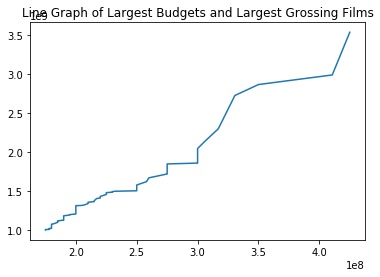

In [240]:
#Line plot of top gross and top budgets 
x = x.nlargest(n = 100)
y = y.nlargest(n = 100)

plt.plot(x, y)
plt.title('Line Graph of Largest Budgets and Largest Grossing Films')

Text(0.5, 1.0, 'Scatter Plot of Largest Budgets and Largest Grossing Films')

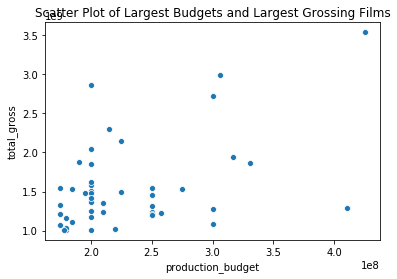

In [241]:
#scatter plot of the above
sns.scatterplot(x, y)
plt.title('Scatter Plot of Largest Budgets and Largest Grossing Films')

Text(0.5, 1.0, 'Regression Plot of Production budget and Total Gross')

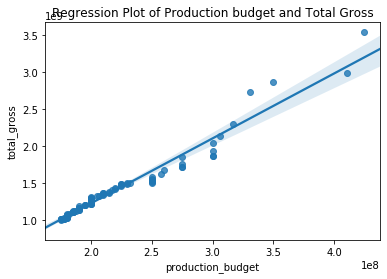

In [242]:
sns.regplot(x, y)
plt.title('Regression Plot of Production budget and Total Gross')

In [243]:
#plt.plot.barh(x, y)

In [244]:
df = tn_movies_budgets

In [245]:
df.sort_values(by = ['total_gross'], ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489
...,...,...,...,...,...,...,...
4192,93,"Mar 15, 2011",A Shine of Rainbows,6000000,0,0,0
4193,94,"Dec 31, 2011",Freaky Deaky,6000000,0,0,0
4194,95,"May 10, 2011",The Hit List,6000000,0,0,0
4856,57,"Nov 14, 2014",Always Woodstock,2400000,0,0,0


In [246]:
np.percentile(df['total_gross'], 10, axis=0)

94687.5

# Created a profit column

In [247]:
x = tn_movies_budgets['production_budget']
y = tn_movies_budgets['total_gross']

tn_movies_budgets['gross_profit'] = y - x

tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [248]:
#tn_movies_budgets.drop(columns=['profit', 'ROI'])

# Created a Profit Margin Column

In [249]:
tn_movies_budgets['Profit_Margin'] = (tn_movies_budgets['gross_profit']/y)*100

In [250]:
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,gross_profit,Profit_Margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,87.983668
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,68.089598
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-81.794855
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,82.245087
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,83.633668


In [251]:
profit_margin = tn_movies_budgets['Profit_Margin']

# Distribution of Profit Margins

(array([ 82., 127., 158., 194., 269., 340., 500., 794., 961., 749.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Distribution of Profit Margins')

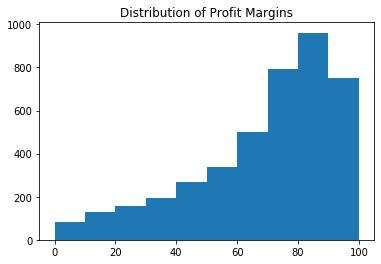

In [252]:
plt.hist(profit_margin,
         bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Distribution of Profit Margins')


# Release data and gross timeseries


print("IMBD Name Basics") 
imdb_name_basics.head()
print('Title AKAS')
titles_akas.head()
print('Title Basics')
titles_basics.head()
print('Title Crew')
title_crew.head()
print('title principals')
title_principals.head()
print('title ratings')
title_ratings.head()
print('tmdb movies')
tmdb_movies.head()

# Remaining datasets to investigate

In [253]:
print("IMBD Name Basics") 
imdb_name_basics.head()
print('Title AKAS')
titles_akas.head()
print('Title Basics')
titles_basics.head()
print('Title Crew')
title_crew.head()
print('title principals')
title_principals.head()
print('title ratings')
title_ratings.head()
print('tmdb movies')
tmdb_movies.head()

IMBD Name Basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


Title AKAS


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


Title Basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Title Crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


title principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


title ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


tmdb movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# The movie database movies EDA

In [254]:
tmdb_movies.shape
tmdb_movies.dtypes #You will need to convert dtypes to strings to match them 

(26517, 10)

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

Text(0.5, 1.0, 'Scatter Plot of Average Vote and Vote Count')

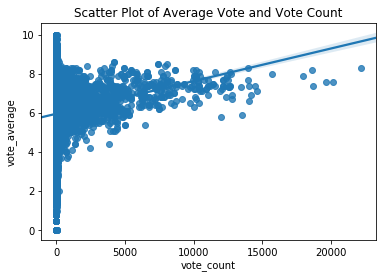

In [255]:
sns.regplot(x = tmdb_movies['vote_count'], y = tmdb_movies['vote_average'])
plt.title('Scatter Plot of Average Vote and Vote Count')

In [256]:
#Trying to drop movies 
x = tmdb_movies[tmdb_movies.vote_count !=0]
x.head()

y = tmdb_movies[tmdb_movies.vote_average !=0]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Text(0.5, 1.0, 'Distribution of Average Number of Votes Per Film')

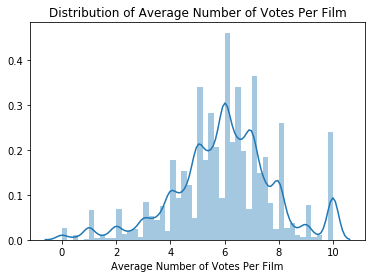

In [257]:
#Distribution of Average Number of Votes 

sns.distplot(tmdb_movies['vote_average'], 
             axlabel= 'Average Number of Votes Per Film')

plt.title('Distribution of Average Number of Votes Per Film')

Text(0.5, 1.0, 'Is the average number of Votes related to popularity?')

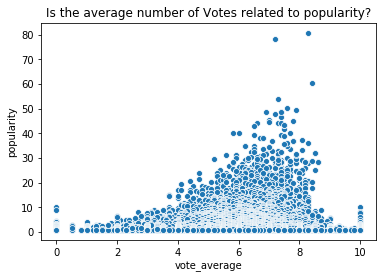

In [258]:
sns.scatterplot(x = tmdb_movies['vote_average'], y = tmdb_movies['popularity'])

plt.title('Is the average number of Votes related to popularity?')

Text(0.5, 1.0, 'Popularity Distribution Plot')

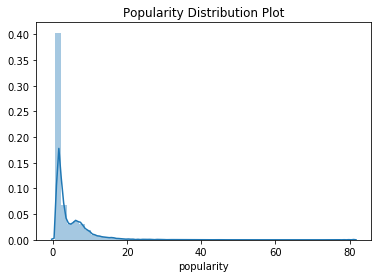

In [259]:
sns.distplot(tmdb_movies['popularity'])
plt.title('Popularity Distribution Plot')

Text(0.5, 1.0, 'Distribution of Vote Count')

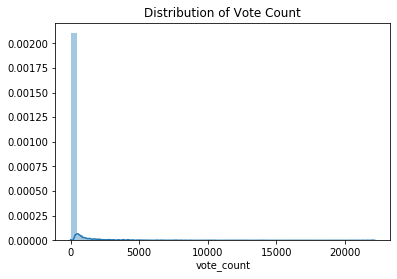

In [260]:
sns.distplot(tmdb_movies['vote_count'])
plt.title('Distribution of Vote Count')

Text(0.5, 1.0, 'Distribution of Average Vote Interval')

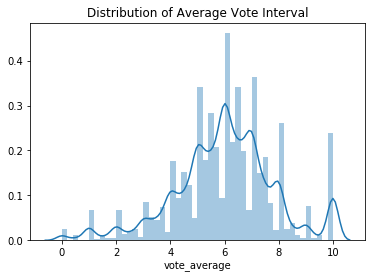

In [261]:
sns.distplot(tmdb_movies['vote_average'])
plt.title('Distribution of Average Vote Interval')

Text(0.5, 1.0, 'Regression Plot of Popularity and Vote Count')

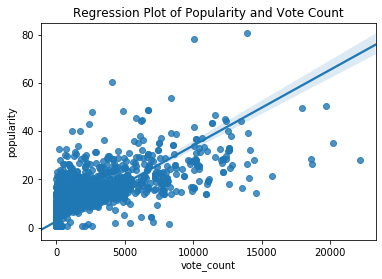

In [262]:
sns.regplot(x='vote_count', y='popularity', data=tmdb_movies)
plt.title('Regression Plot of Popularity and Vote Count')

# Genre Data Cleaning 

In [263]:
#Created a joined DF that merges genre with titles 

query = """SELECT tn.*, imdb.genres
           FROM tn_movie_budgets as tn
           LEFT JOIN title_basics as imdb
           ON tn.movie = imdb.primary_title"""

joined_df = pd.read_sql(query, conn)
joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None


In [264]:
joined_df.shape, tn_movies_budgets.shape

#the data set got bigger
len(joined_df) - len(tn_movies_budgets)

((7221, 7), (5782, 9))

1439

In [265]:
joined_df[joined_df['genres']!=joined_df['genres']]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",None
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",None
15,16,"May 4, 2007",Spider-Man 3,"$258,000,000","$336,530,303","$894,860,230",None
19,20,"Jul 15, 2009",Harry Potter and the Half-Blood Prince,"$250,000,000","$302,089,278","$935,213,767",None
...,...,...,...,...,...,...,...
7214,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644",None
7215,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,None
7217,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",None
7218,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",None


In [266]:
#Function splits all the genre column into individual letters

all_genres = set()
for genres in joined_df['genres']:
    if genres:
        all_genres.update(genres)
        
all_genres

{',',
 '-',
 'A',
 'B',
 'C',
 'D',
 'F',
 'H',
 'M',
 'N',
 'R',
 'S',
 'T',
 'V',
 'W',
 'a',
 'c',
 'd',
 'e',
 'g',
 'h',
 'i',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y'}

In [267]:
#split() method returns a list of strings after breaking the given string by the specified separator. Syntax : str.split(separator, maxsplit).

joined_df['genres'] = joined_df['genres'].apply(lambda x: x.split(",") if x else x)
joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","[Action, Adventure, Sci-Fi]"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",None


In [268]:
joined_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
genres               object
dtype: object

In [269]:
#change data types

joined_df['production_budget'] = joined_df['production_budget'].apply(clean)

In [270]:
joined_df['domestic_gross'] = joined_df['domestic_gross'].apply(clean)


In [271]:
joined_df['worldwide_gross'] = joined_df['worldwide_gross'].apply(clean)

In [272]:
joined_df.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
genres               object
dtype: object

In [275]:
#joined_df.drop(columns = ['total_gross', 'domest_gross']) #cleaning mistakes made earlier 

In [276]:

#joined_df['domestic_gross'] = joined_df['domestic_gross'].apply(clean)


TypeError: 'int' object is not iterable

In [278]:
joined_df['total_gross'] = joined_df['domestic_gross'] + joined_df['worldwide_gross']

joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,[Horror],3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[Action, Adventure, Fantasy]",1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,"[Action, Adventure, Sci-Fi]",192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[Action, Adventure, Sci-Fi]",1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,None,1936903129


In [279]:
#Repeating process above to amend current data frame 

x = joined_df['production_budget']
y = joined_df['total_gross']

joined_df['gross_profit'] = y - x

joined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,total_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,[Horror],3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[Action, Adventure, Fantasy]",1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,"[Action, Adventure, Sci-Fi]",192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,"[Action, Adventure, Sci-Fi]",1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,None,1936903129,1619903129


In [280]:
#List of the 50 most profitable movies 

top_5_budget_gross_diff_movies = joined_df.sort_values(by='gross_profit', ascending=False)['movie'][:50]
top_5_budget_gross_diff_movies

0                                              Avatar
5                Star Wars Ep. VII: The Force Awakens
47                                            Titanic
46                                            Titanic
6                              Avengers: Infinity War
33                                     Jurassic World
26                                       The Avengers
45                                      Black Panther
73                                          Furious 7
48                                      Incredibles 2
4                   Star Wars Ep. VIII: The Last Jedi
155                              Beauty and the Beast
156                              Beauty and the Beast
157                              Beauty and the Beast
318     Harry Potter and the Deathly Hallows: Part II
132                    Jurassic World: Fallen Kingdom
3                             Avengers: Age of Ultron
180                                            Frozen
182                         

In [281]:
genre_count = {}

for movie in top_5_budget_gross_diff_movies:
    movie_genres = joined_df[joined_df['movie']==movie]['genres'].values[0]
    try:
        for genre in movie_genres:
            genre_count[genre] = genre_count.get(genre, 0) + 1
    except: 
        genre_count['not_listed'] = genre_count.get('not_listed', 0) + 1 
        
genre_count

{'Horror': 1,
 'not_listed': 14,
 'Adventure': 29,
 'Action': 18,
 'Sci-Fi': 11,
 'Crime': 2,
 'Thriller': 4,
 'Animation': 12,
 'Drama': 4,
 'Fantasy': 5,
 'Romance': 3,
 'Comedy': 11,
 'Family': 1}

In [282]:
genre_top_count = pd.DataFrame([genre_count])
genre_top_count.head()

,Horror,not_listed,Adventure,Action,Sci-Fi,Crime,Thriller,Animation,Drama,Fantasy,Romance,Comedy,Family
0,1,14,29,18,11,2,4,12,4,5,3,11,1


In [283]:
values = []
labels = []

for genre, count in genre_count.items():
    labels.append(genre)
    values.append(count)

<Figure size 576x360 with 0 Axes>

<BarContainer object of 13 artists>

Text(0.5, 1.0, 'Genre Count for Top 50 Most Profitable Movies')

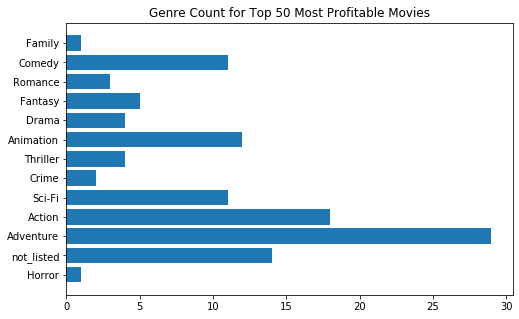

In [284]:
plt.figure(figsize= (8, 5))
plt.barh(labels, values)
plt.title('Genre Count for Top 50 Most Profitable Movies')